In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1 : Data Collection

In [2]:
filepath_House_Price = r"C:\Users\aakas\PythonStuff\Regression_udemy\resources\Linear_Regression\House_Price.csv"

In [3]:
houses = pd.read_csv(filepath_House_Price , header = 0 )

In [4]:
houses.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [ ]:
# society blocks
# direct airport connectivity 

## STEP 2 : Basic information about data

#### (i) For finding number of rows and columns

In [5]:
houses.shape

(506, 19)

#### (ii) To see number of null values , datatypes and memory usage

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
houses.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

#### (iii) Finding Duplicate rows

In [11]:
houses[houses.duplicated(keep = False)]

# no duplicated rows

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks


#### (iv) Applying basic statstical computations on the dataset

- Extreme values (min & max values), 
- count of data points, 
- Quantiles, 
- mean ,
- standard deviation, etc.

In [12]:
houses.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


#### (v) Fetching numerical and categorical columns

In [8]:
def num_cat_col_list(DF) : 
    
    from pandas.api.types import is_string_dtype, is_numeric_dtype

    
    num_list = []
    cat_list = []

    for column in DF:

        if is_numeric_dtype(DF[column]):
            num_list.append(column)

        elif is_string_dtype(DF[column]):
            cat_list.append(column)

    return (num_list , cat_list)

In [9]:
num_list , cat_list = num_cat_col_list(houses)

print("Numerical column : ",num_list,"\n")
print("Categorical column : ",cat_list)

Numerical column :  ['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age', 'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks'] 

Categorical column :  ['airport', 'waterbody', 'bus_ter']


#### (vi) finding unique values in the categorical attributes

In [10]:
for col in cat_list:
    
    print(f"{col} : " ,houses[col].unique())
    print("\n")

airport :  ['YES' 'NO']


waterbody :  ['River' 'Lake' 'None' 'Lake and River']


bus_ter :  ['YES']




## STEP 3 : UNIVARIATE ANALYSIS

### (i) Histogram-kde  for Numerical  attributes.

In [16]:
def hist_kde_plot(DF , num_list):
    
    total_size1 = len(num_list) 

    n_cols1 = 2
    n_rows1 = int(np.ceil(total_size1/n_cols1))

    fig1,axes1 = plt.subplots(nrows = n_rows1 ,ncols = n_cols1 , figsize = (12,18))

    i = 0
    j = 0

    fig1.suptitle("HISTOGRAM \n", fontweight="bold" ,fontsize=20)


    for col in num_list:


        axes2 = sns.histplot(ax = axes1[i,j], data = DF , x = col ,kde =  True ,bins = 20)
        fig1.tight_layout()

        axes2.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        if j == n_cols1 -1:

            i +=1
            j = 0

        else :
            j+=1  


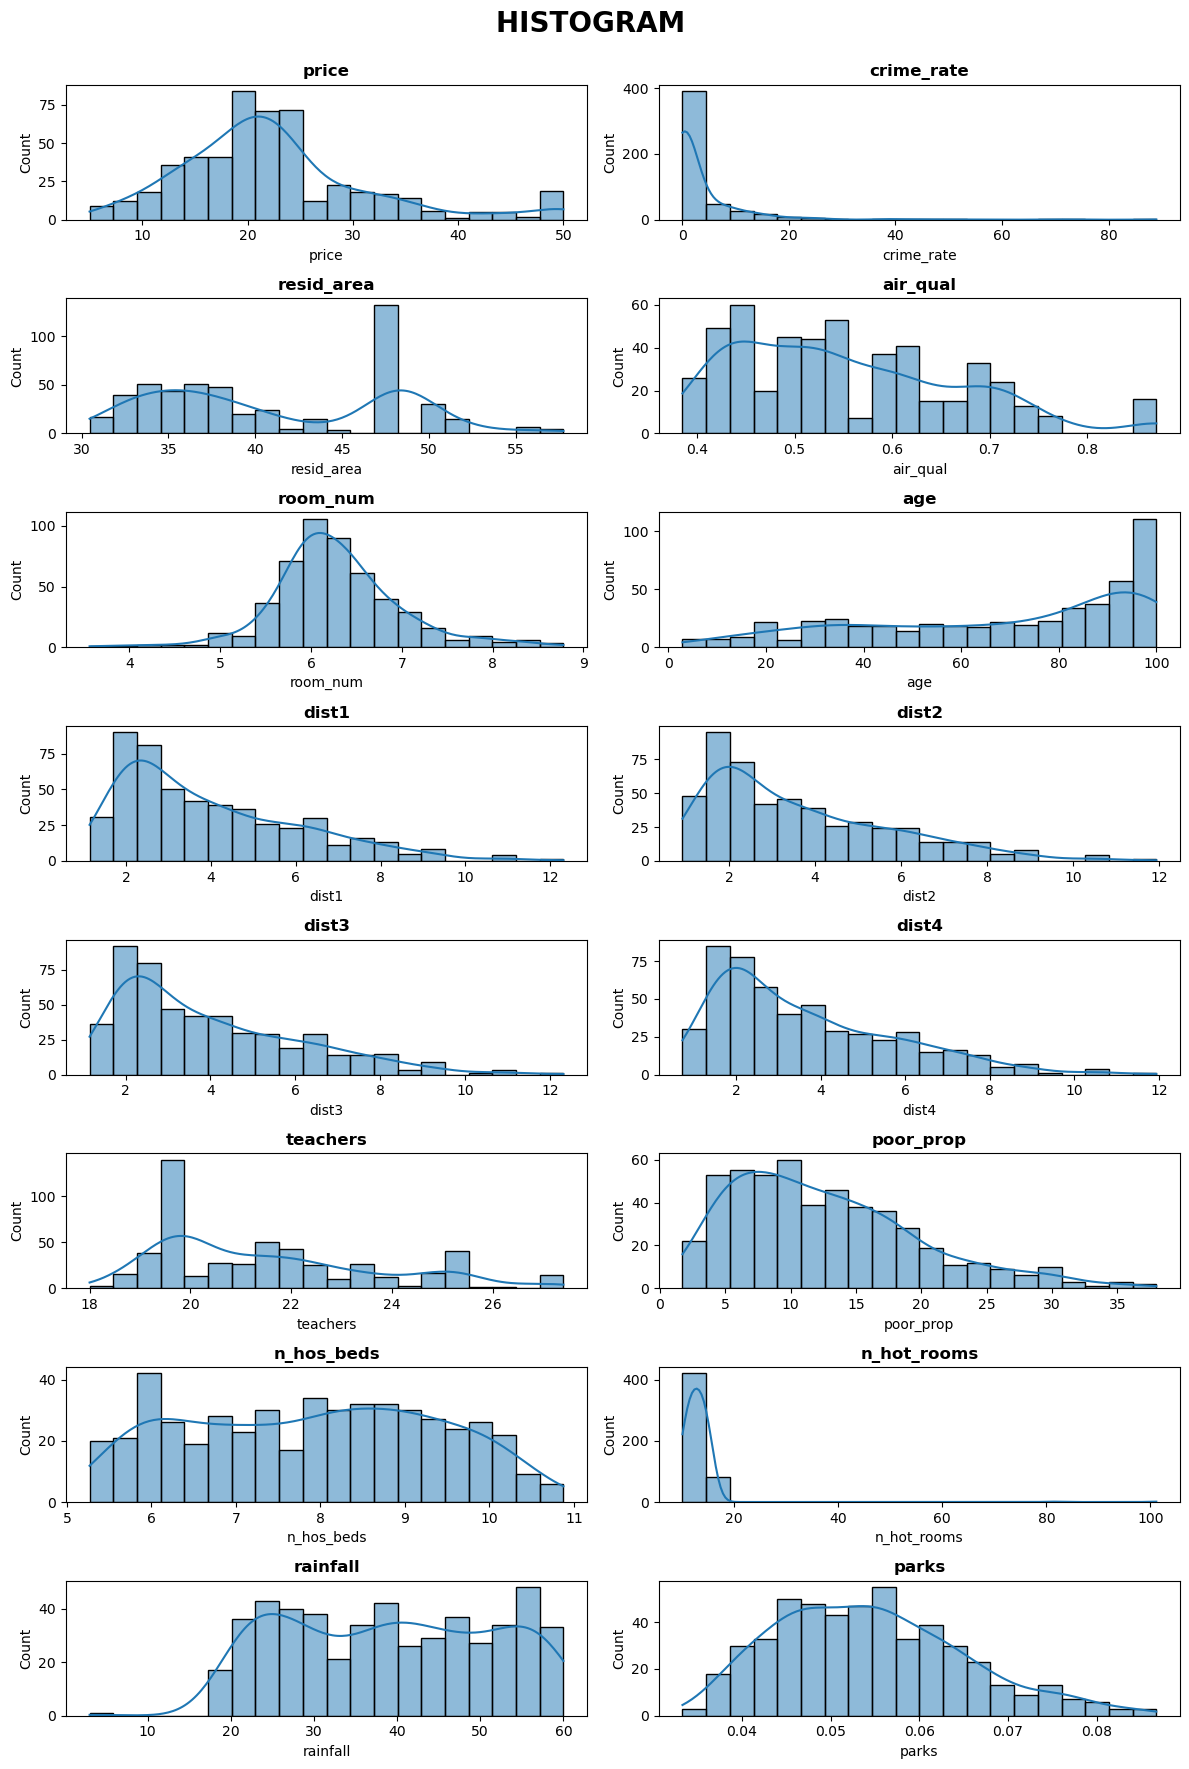

In [17]:
hist_kde_plot(DF = houses, num_list=num_list)

### Insights from above histogram

- **normally distributed** : room_num 

- **skewed distribution** : air_qual , dist1 , dist2 , dist3 , dist4 , teachers, poor_prop and parks 


### (ii) countplot for  categorical attributes 

In [20]:
def countplot_cat_col(DF,cat_list):
    
    total_size2 = len(cat_list)

    n_cols2 = 2
    n_rows2 = int(np.ceil(total_size2/n_cols2))

    fig3,axes3 = plt.subplots(nrows = n_rows2 ,ncols = n_cols2 , figsize = (10,6))
    fig3.tight_layout()

    i = 0
    j = 0
    
    fig3.suptitle("COUNTPLOTS \n", fontweight="bold" ,fontsize=20)

    for col in cat_list:

        fig3.tight_layout()

        axes4 = sns.countplot(ax = axes3[i,j], data = houses , x = col ,hue = col )

        axes4.set(xticklabels=[])
        axes4.set(xlabel=None)
        axes4.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes4.set(ylabel='Frequency')
        axes4.grid(visible=True ,axis ='y')
        
        if j == n_cols2 -1 :
        
            i +=1
            j = 0
        
        else :
            j += 1 
        

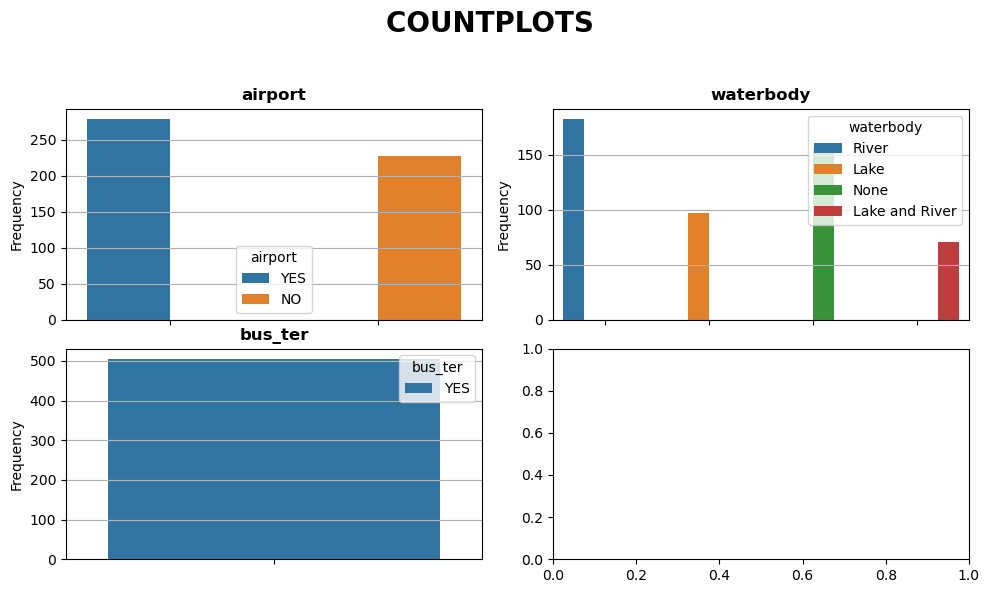

In [21]:
countplot_cat_col(DF = houses , cat_list=cat_list)

### (iii) Boxplot for numerical attributes for finding the outleirs

#### normally , almost normally or skewed distributed columns.

In [15]:
# num_list 

In [12]:
cols = ['room_num' , 'air_qual' ,'dist1','dist2','dist3' , 'dist4', 'teachers', 'poor_prop','parks']

In [13]:
def boxplot(DF , cols):
    
    total_size_num = len(cols) 
 
    n_cols=2
    n_rows= int(np.ceil(total_size_num/n_cols))

    fig5, axes5 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (12,10),)

    i = 0
    j = 0


    fig5.suptitle("BOXPLOTS\n", fontweight="bold" ,fontsize=20)
    fig5.tight_layout()

    for col in cols:

        axes6 = DF[col].plot.box(ax = axes5[i,j],vert = 0)
        axes6.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes6.set(yticklabels=[])
        fig5.tight_layout()

        if j == n_cols-1:
            i = i + 1
            j = 0

        else:
            j = j + 1
    

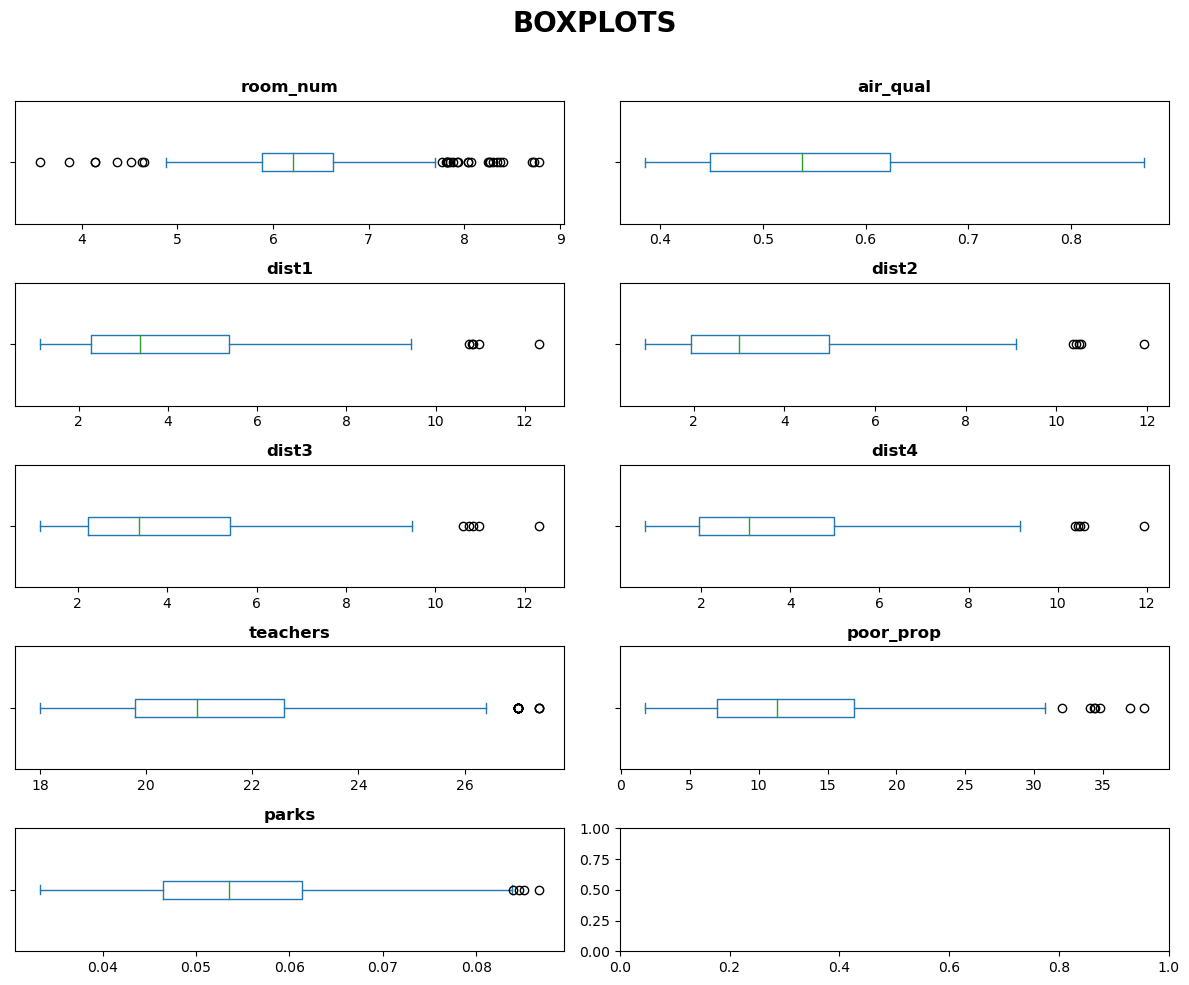

In [14]:
boxplot(DF = houses , cols =cols )

### Insights

- **air_qual** feature has no outliers outliers.
- **room_num** feature has outliers on both sides.
- **dist1**, **dist2** , **dist3** ,  **dist4** ,**teachers**, **poor_prop** & **parks** features have    outliers on right sides.

## STEP - 4 : Bi-Variate Analysis

- **Bivariate analysis** is categorized into these three conditions to address various combinations of
  numerical variables and categorical variables.

### (i) Numerical vs. Numerical → heat map or pairplot

In [29]:
def correlation_map(DF):
    
    correlation = round(DF.corr(numeric_only =True),3)
    
    plt.figure(figsize = (12,12) ,dpi = 120 , layout = 'tight' )
    sns.heatmap(correlation,cmap = 'GnBu' , annot = True)

    plt.show()  

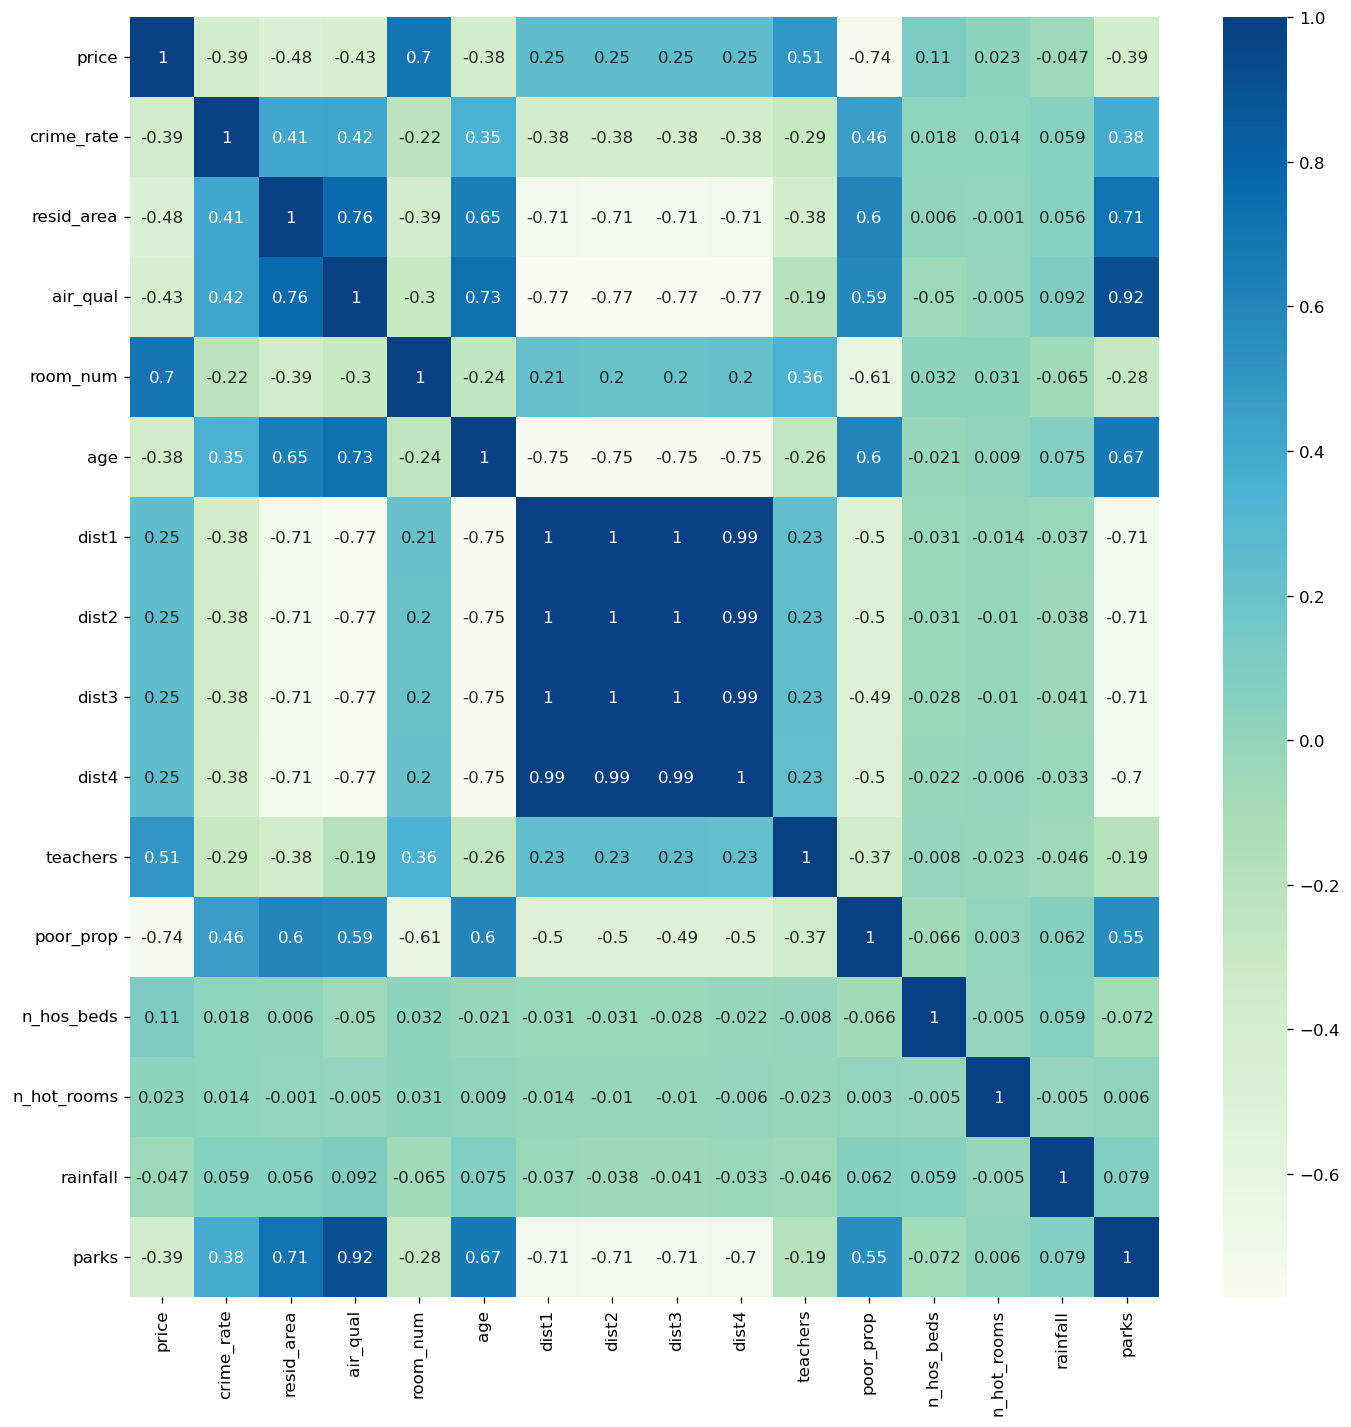

In [30]:
correlation_map(DF = houses)

### Insights

- **air_quality** and  **parks** has Correlation coefficient = 0.92.
- **dist1** and **dist2** has correlation coefficient = 1. 
- **dist1** and **dist3** has correlation coefficient = 1. 
- **dist1** and **dist4** has correlation coefficient = 0.99. 

In [19]:
houses.corrwith(other = houses['price'] ,numeric_only= True).sort_values(ascending=False, 
                                                                         key=lambda x: abs(x))

price          1.000000
poor_prop     -0.740836
room_num       0.696304
teachers       0.505655
resid_area    -0.484754
air_qual      -0.429300
parks         -0.391574
crime_rate    -0.389582
age           -0.377999
dist1          0.251355
dist2          0.249459
dist4          0.248200
dist3          0.246650
n_hos_beds     0.109646
rainfall      -0.047426
n_hot_rooms    0.023122
dtype: float64

### (ii) Scatterplots

In [44]:
def scatterplot(DF,num_list):
    
    num_list_test = num_list.copy()
    num_list_test.remove('price')
    
    n_cols = 2
    n_rows = int(np.ceil(len(num_list_test)/ n_cols))


    fig11, axes11 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (12,22),)

    fig11.suptitle("ScatterPlots\n\n", fontweight="bold" ,fontsize=20)

    fig11.tight_layout()

    i = 0
    j = 0

    for column in num_list_test : 

        fig11.tight_layout()

        axes12 = sns.scatterplot(ax = axes11[i,j], data = DF , y = 'price' ,
                                 x = column, 
                                
                                )

        axes12.set_title(f"House Price vs : {column}" , fontsize = 14 , fontweight = 'bold')

        if j == n_cols-1:
            i = i + 1
            j = 0

        else:
            j = j + 1


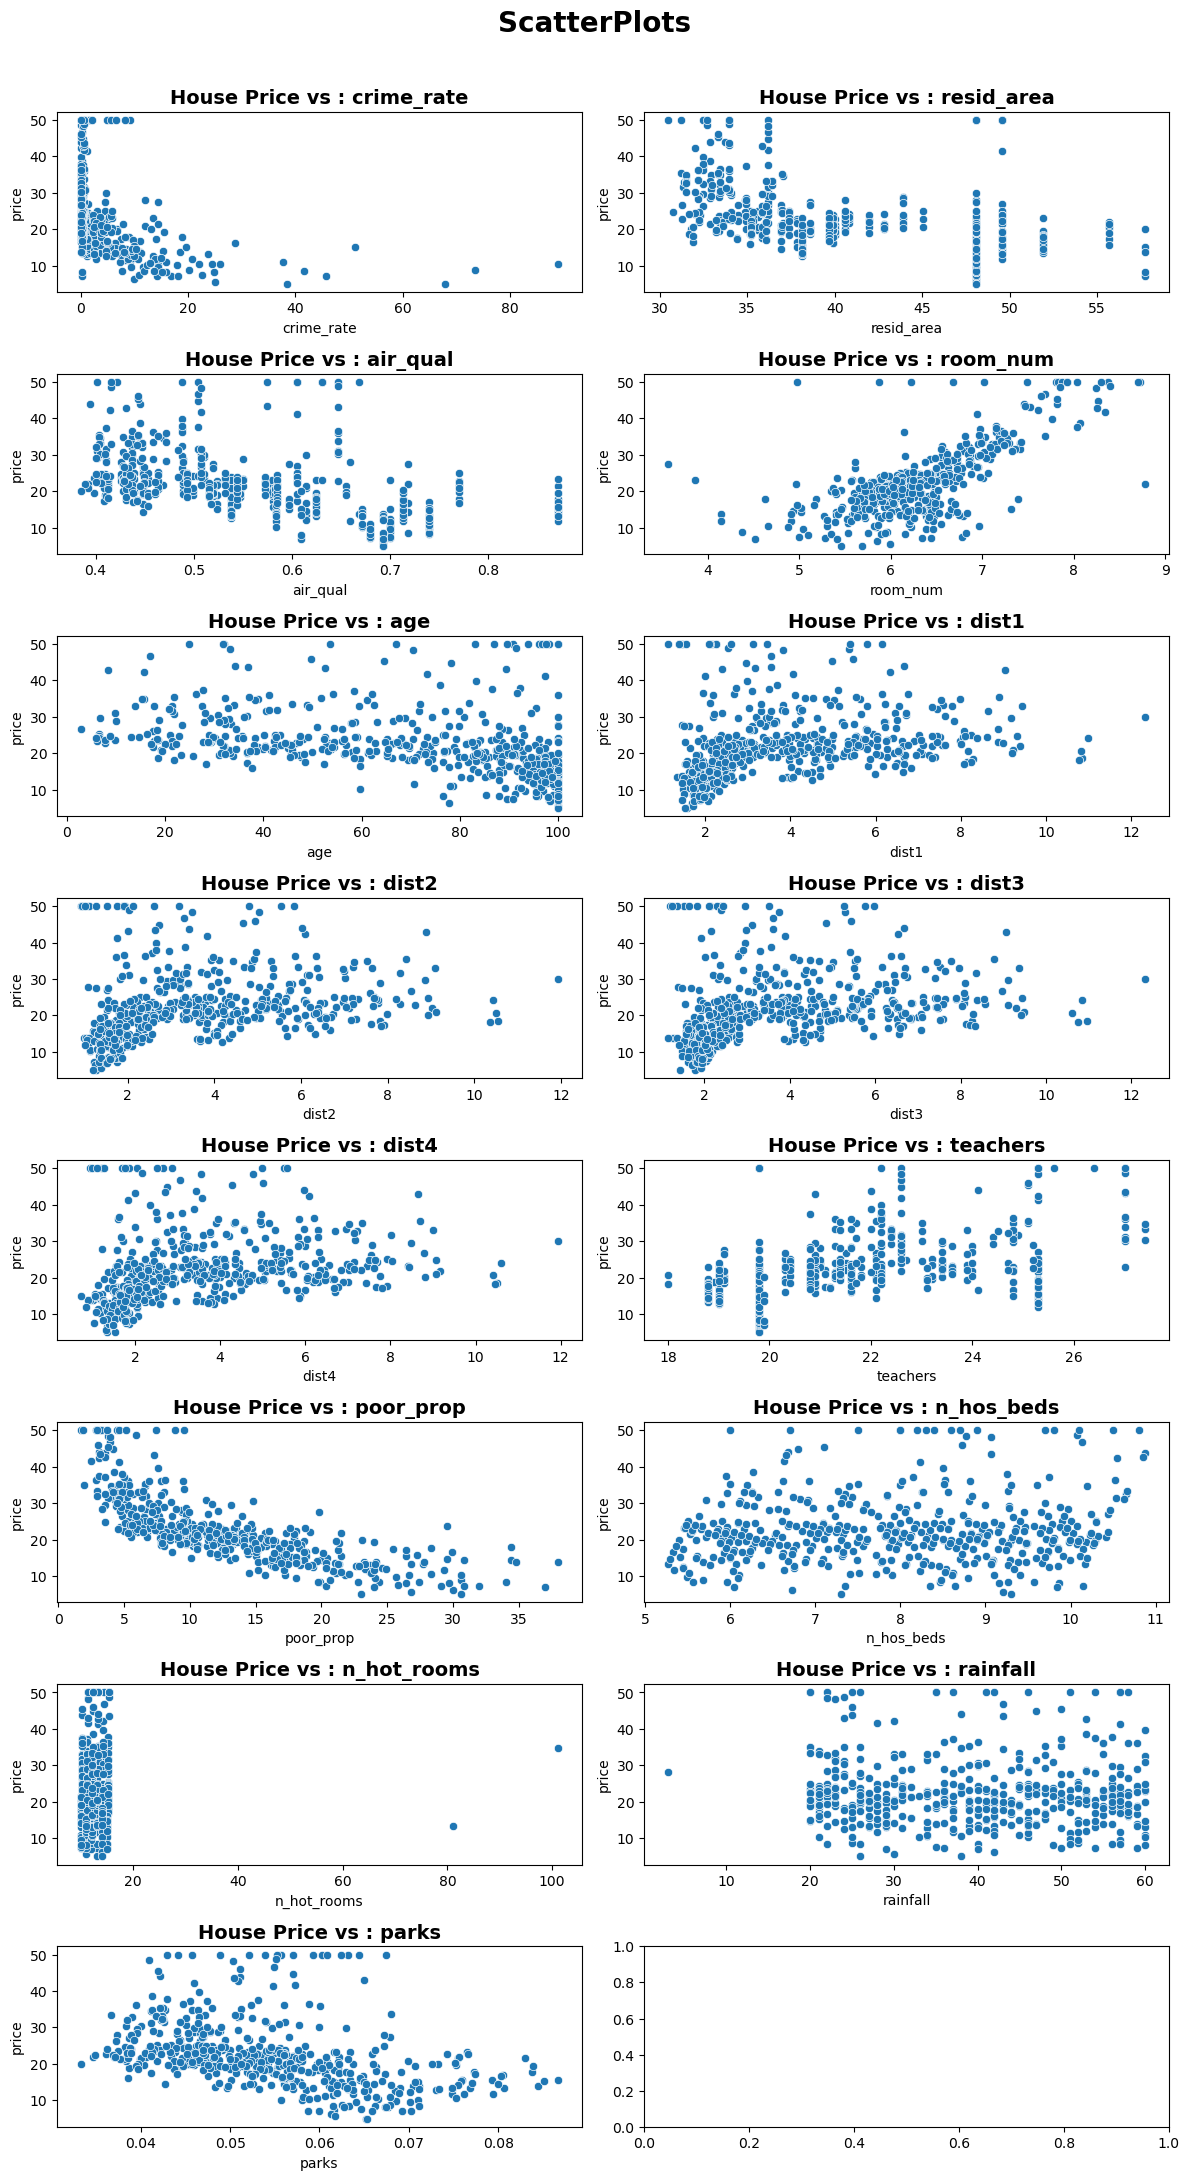

In [45]:
scatterplot(DF = houses , num_list=num_list)

### Insights

- **price** & **crime_rate** vs has power law distribution      
- **price** & **poor_prop** vs has power law distribution    

### (ii) Numerical versus categorical pairplot

In [30]:
cat_list

['airport', 'waterbody', 'bus_ter']

In [46]:
hue_list_test  = ['airport', 'waterbody']

num_list_test = ['resid_area' , 'room_num' ,'teachers' , 'poor_prop',
                   'air_qual','parks','crime_rate','age']

In [49]:
def scatterplot_hue(DF , num_list , hue_list) :
    

    num_plots = len(num_list)*len(hue_list)

    n_cols = 2
    n_rows = int(np.ceil(num_plots/ n_cols))


    fig9, axes9 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (12,22),)
    fig9.suptitle("SCATTERPLOTS WITH HUE\n", fontweight="bold" ,fontsize=20)
    fig9.tight_layout()

    i = 0
    j = 0

    for column in num_list : 

        for hue in hue_list:
            fig9.tight_layout()
            axes10 = sns.scatterplot(ax = axes9[i,j],data = DF , y = 'price' ,
                                    x = column, 
                                    hue= hue , 
                                    palette= 'deep' , alpha = 0.6)

            axes10.set_title(f"Hue : {hue.upper()}" , fontsize = 14 , fontweight = 'bold')

            if j == n_cols-1:
                i = i + 1
                j = 0

            else:
                j = j + 1

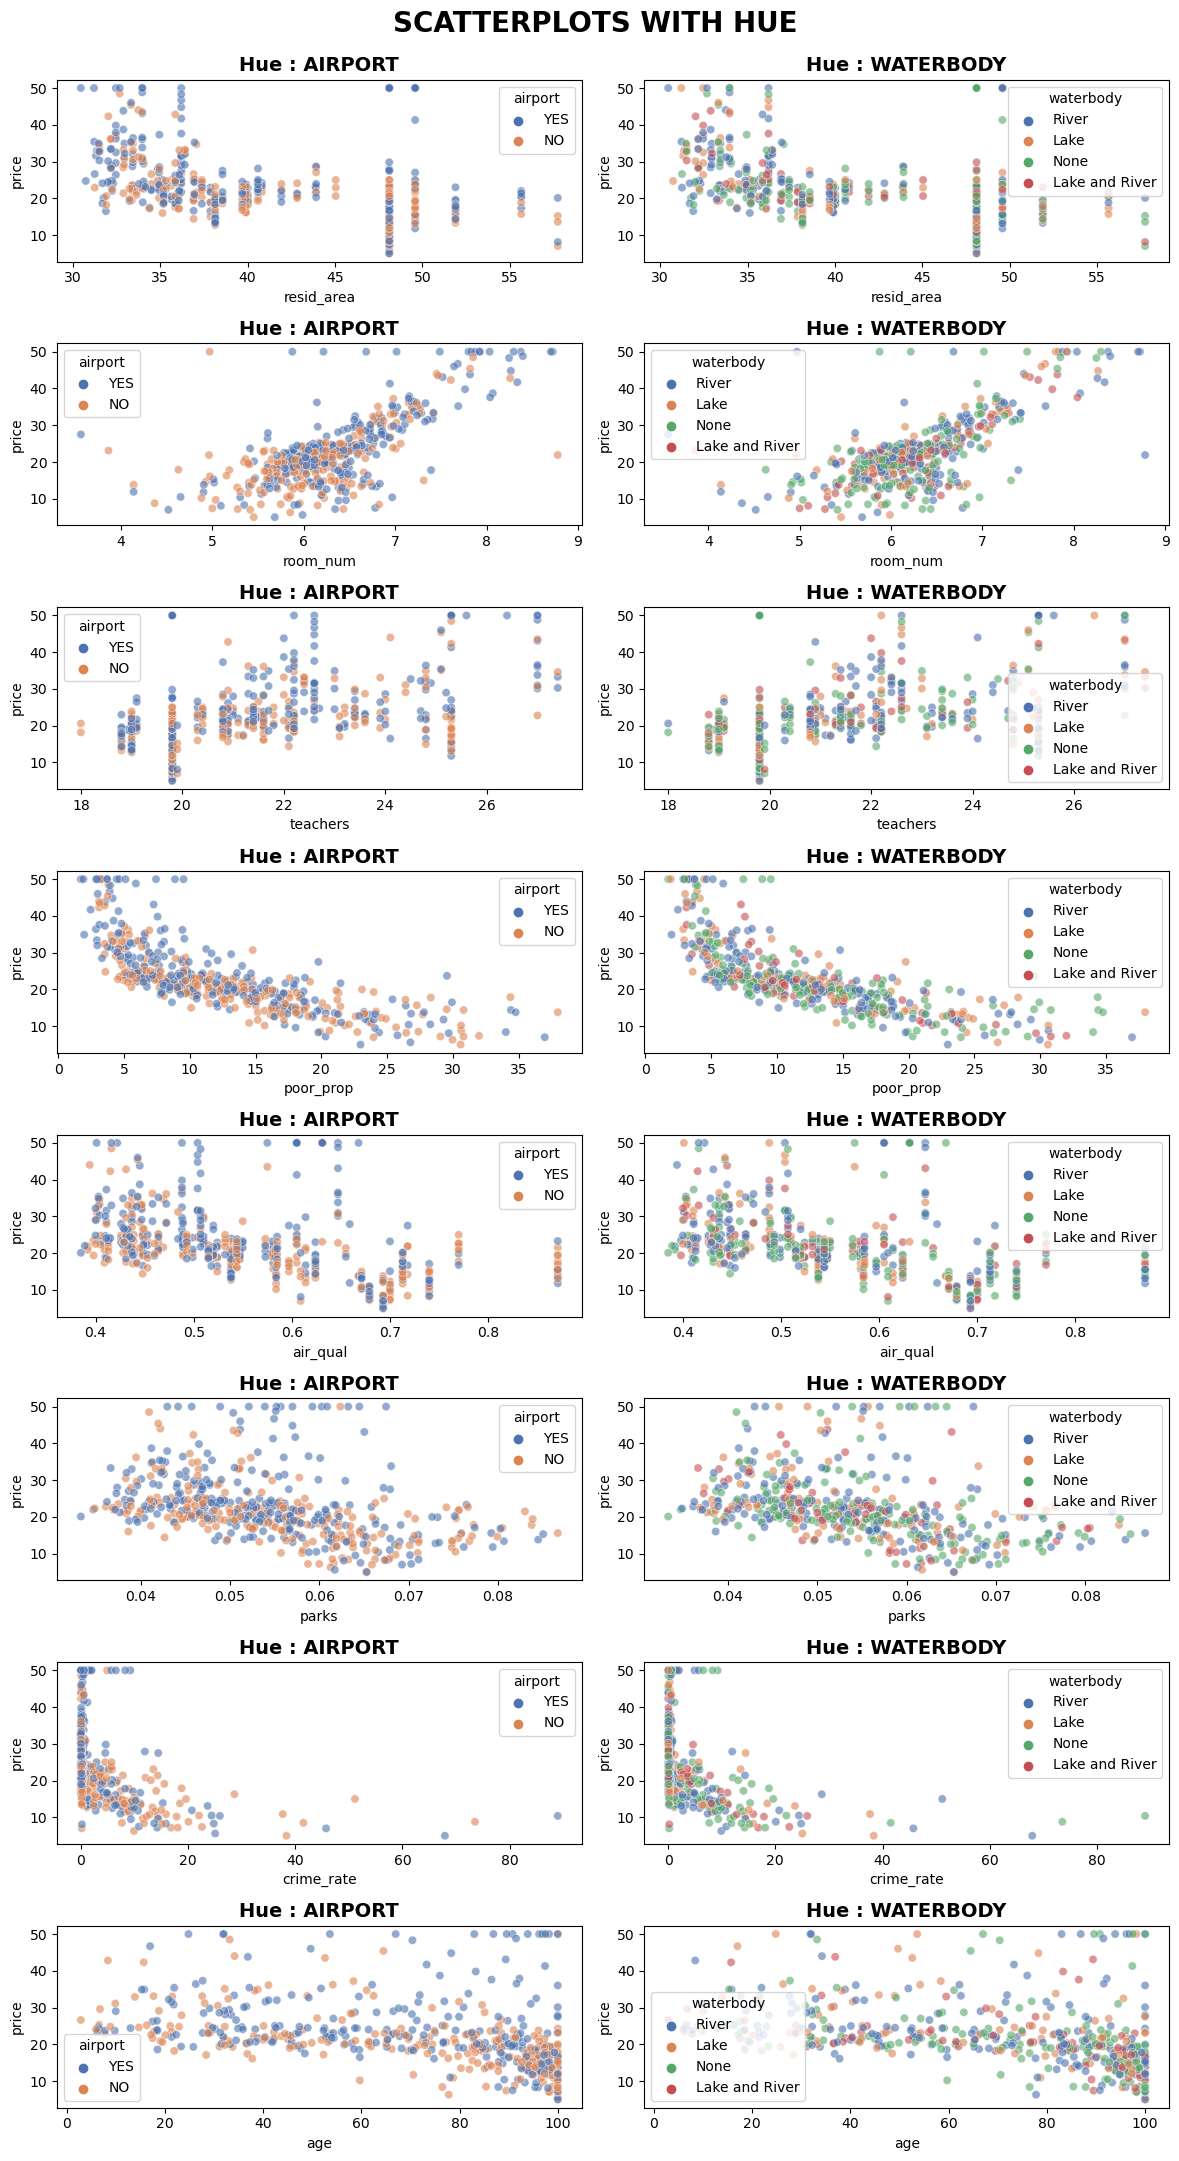

In [50]:
scatterplot_hue(DF = houses , num_list = num_list_test , hue_list = hue_list_test)

## STEP - 5 : Multi-Variate Analysis

#### From correlation analysis following conclusions have been made:

 
- **dist1** is highly correlated with **dist2**, **dist3** & **dist4** with correlation coefficent >=0.99
- **air_quality** is highly correlated with **parks** with Correlation coefficient = 0.92

#### checking  for multicollinarity

- **Threshold value** of VIF is : VIF >= 10 for dropping a column



In [32]:
# houses.columns

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#### Syntax : variance_inflation_factor(exog, exog_idx)

- **Explanation :**

    One recommendation is that if VIF is greater than 5, then the explanatory variable given by 

    'exog_idx' is highly collinear with the other explanatory variables, and 

    the parameter estimates will have large standard errors because of this.

In [34]:
df_houses = houses.copy()

In [35]:
len(df_houses)

506

In [36]:
df_houses.dropna(inplace = True)

In [37]:
len(df_houses)

498

In [38]:
mc_feat = ['resid_area' , 'room_num' ,'teachers' , 'poor_prop','dist1', 
           'dist2', 'dist3', 'dist4','parks','air_qual']

In [39]:
# Defining custom function for calculating VIF

def compute_vif(feature_list ,dataframe):
    
    X = dataframe[feature_list]
    
    # Dropping any NaN values
    X.dropna(inplace = True)
    
    # Adding constant column in X
    X  = add_constant(X ,prepend=True)
    
    # Creating DF for storing VIF values
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    
    
    vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
    
    vif = vif[vif['variable'] != 'const']
    
    return vif

In [40]:
# mc_feat

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
compute_vif(feature_list = mc_feat ,dataframe = df_houses)

,variable,VIF
1,resid_area,3.167443
2,room_num,1.740857
3,teachers,1.318547
4,poor_prop,2.424076
5,dist1,314.319983
6,dist2,358.071532
7,dist3,345.717764
8,dist4,96.256746
9,parks,6.207035
10,air_qual,8.509740


In [43]:
# lets remove 'dist2' column

mc_feat.remove('dist2')

In [44]:
mc_feat

['resid_area',
 'room_num',
 'teachers',
 'poor_prop',
 'dist1',
 'dist3',
 'dist4',
 'parks',
 'air_qual']

In [45]:
compute_vif(feature_list = mc_feat , dataframe  = df_houses)

,variable,VIF
1,resid_area,3.166202
2,room_num,1.740211
3,teachers,1.317630
4,poor_prop,2.421969
5,dist1,251.737778
6,dist3,254.918565
7,dist4,94.275610
8,parks,6.205139
9,air_qual,8.495325


In [46]:
# lets remove 'dist3' column

mc_feat.remove('dist3')

In [47]:
compute_vif(feature_list = mc_feat , dataframe  = df_houses)

,variable,VIF
1,resid_area,3.163197
2,room_num,1.725598
3,teachers,1.313819
4,poor_prop,2.417414
5,dist1,86.328871
6,dist4,85.309646
7,parks,6.138321
8,air_qual,8.483502


In [48]:
# lets remove 'dist1' column

mc_feat.remove('dist1')

In [49]:
compute_vif(feature_list = mc_feat , dataframe  = df_houses)

,variable,VIF
1,resid_area,3.163029
2,room_num,1.725595
3,teachers,1.309749
4,poor_prop,2.417388
5,dist4,2.706796
6,parks,6.135967
7,air_qual,8.428561


In [50]:
# lets remove 'parks' column because
# correlation coefficent of 'price' with 'air_qual'= -0.429300
# correlation coefficent of 'price' with 'parks' = -0.391574
# but be careful

mc_feat.remove('parks')

In [51]:
compute_vif(feature_list = mc_feat , dataframe  = df_houses)

,variable,VIF
1,resid_area,3.160871
2,room_num,1.725368
3,teachers,1.309017
4,poor_prop,2.416106
5,dist4,2.706672
6,air_qual,3.514231


#### Conclusion : we have to do feature enginnering
- we can drop the **dist1**, **dist2** , **dist3** ,  columns. (if needed)
- **parks** and **air_qual** columns are highly correlated ,so we can drop **parks** column
   because it is less correlated to **price** column compared to **air_qual** column.